# COMPUTER VISION AND PATTERN RECOGNITION PROJECT
## Alessandro Cesa

In [1]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [2]:
from image_handling_functions import *
from train_test_functions import *
from neural_networks import *

In [3]:
"""
#Run if you don't already have the dataset
%%capture
!wget -c https://github.com/AlessandroCesaTs/Computer_Vision_Project_Cesa/archive/main/CVPR2023_project_2_and_3_data.zip
!unzip CVPR2023_project_2_and_3_data.zip
"""

"\n#Run if you don't already have the dataset\n%%capture\n!wget -c https://github.com/AlessandroCesaTs/Computer_Vision_Project_Cesa/archive/main/CVPR2023_project_2_and_3_data.zip\n!unzip CVPR2023_project_2_and_3_data.zip\n"

In [4]:
#Adjust according to your path
train_path = "CVPR2023_project_2_and_3_data/train"
test_path = "CVPR2023_project_2_and_3_data/test"

In [5]:
device = get_default_device()

In [6]:
train=ImageFolder(root=train_path,transform=resize_transformation)
test=ImageFolder(root=test_path,transform=resize_transformation)

In [7]:
%%capture
"""
# check the dataset size
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")
print(train.classes)
"""

In [8]:
%%capture
"""
# get image no. 1 and its label
index=1
img,label=train[index]

print(f"label: {label}")

print("class: " + train.classes[label])
# display
figure = plt.figure()
plt.imshow(img.numpy().transpose((1, 2, 0)),cmap='gray') #<< swap axes because img is (3,H,W) but imshow() expects (H,W,3)
"""

In [9]:
np.random.seed(123)
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if device.type == 'cuda':
    torch.cuda.empty_cache()

In [10]:
#split training set into training and validation
train_size=int(0.85*len(train))
validation_size=len(train)-train_size
training_set,validation_set=torch.utils.data.random_split(train,[train_size,validation_size])

In [11]:
# Create data loaders.
# Data loaders are basically objects that make easy to iterate through the data by batches of some batch_size
batch_size = 32
train_loader = DataLoader(training_set, batch_size=batch_size,shuffle=True,pin_memory=True)
validation_loader = DataLoader(validation_set, batch_size=batch_size,shuffle=False,pin_memory=True)
test_loader = DataLoader(test, batch_size=batch_size,shuffle=False,pin_memory=True)

In [12]:
train_loader = DeviceDataLoader(train_loader, device)
validation_loader = DeviceDataLoader(validation_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [13]:
%%capture
"""
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
"""

In [14]:
%%capture
"""
# get a batch from the training set
dataiter = iter(train_loader)
images, labels = next(dataiter)   #images is a (batch_size,3,32,32) tensor

print(images.size())
"""

In [15]:
%%capture
"""
classes=train.classes

# get a batch from the training set
dataiter = iter(train_loader)
images, labels = next(dataiter)   #images is a (batch_size,3,32,32) tensor

print(images.size())

img=torchvision.utils.make_grid(images)
figure = plt.figure()
plt.imshow(img.numpy().transpose((1, 2, 0)).astype(np.uint8),cmap='gray') #<< swap axes because img is (3,H,W) but imshow() expects (H,W,3)

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
"""

In [16]:
%%capture
"""
# display the last image only
figure = plt.figure()
plt.imshow(images[-1,:,:,:].numpy().transpose((1,2,0)),cmap='gray')
print(f'{train.classes[labels[-1]]:5s}')
"""

In [17]:
# Instantiate the model
model = simpleCNN()
model.to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
# Print the model summary
#print(model)

EPOCH1:


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


LOSS train: 2.7084351181983948 validation: 2.707848072052002 | validation_accuracy: 8.0% 
EPOCH2:
LOSS train: 2.7080617010593415 validation: 2.7079617977142334 | validation_accuracy: 4.0% 
EPOCH3:
LOSS train: 2.7077465116977693 validation: 2.7076923847198486 | validation_accuracy: 5.333333333333333% 
EPOCH4:
LOSS train: 2.7075375378131867 validation: 2.7078325748443604 | validation_accuracy: 4.888888888888889% 
EPOCH5:
LOSS train: 2.706972712278366 validation: 2.706824779510498 | validation_accuracy: 6.666666666666667% 
EPOCH6:
LOSS train: 2.705697160959244 validation: 2.7057559490203857 | validation_accuracy: 6.222222222222222% 
EPOCH7:
LOSS train: 2.7025660455226896 validation: 2.700547933578491 | validation_accuracy: 7.111111111111111% 
EPOCH8:
LOSS train: 2.6882191002368927 validation: 2.652132034301758 | validation_accuracy: 15.11111111111111% 
EPOCH9:
LOSS train: 2.6640788555145263 validation: 2.6845598220825195 | validation_accuracy: 8.0% 
EPOCH10:
LOSS train: 2.617838418483734 

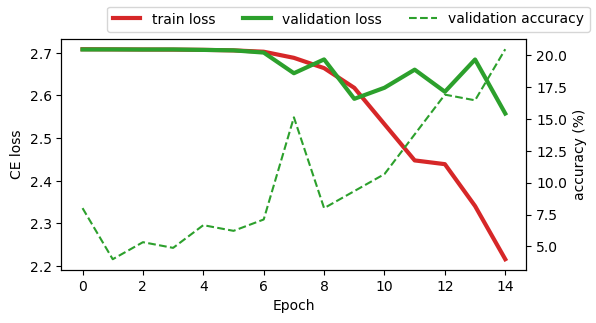

In [18]:
model_path=train_model(model,train_loader,validation_loader,loss_function,optimizer,15,device)

Accuracy of the network on the test images: 20.134003350083752%


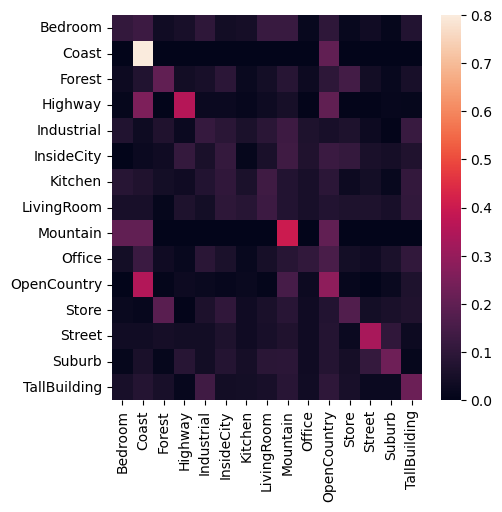

In [19]:
test_model(simpleCNN(),model_path,test_loader,test,device)

In [20]:
!rm model*